---
title: "Chapter 2, Part 3 : KNN and Validation"
subtitle: "Machine Learning"
date: "January 2026"
date-format: "MMMM YYYY"
author: 
  - F.San Segundo & N.Rodríguez
bibliography: ../exclude/mlmiin.bib
execute:
  echo: true
code-overflow: wrap
format: 
  html: 
    toc: true
    code-tools: true
    code-fold: show
    code-summary: "Hide the code"
    embed-resources: true
---

::: {.callout-important}

## COPY THIS NOTEBOOK FIRST

<h2 style="color:blue; font-weight:bold;">Checklist</h2>

+ Have you started Docker Desktop?
+ Have you launched Docker from the `MLMIIN` repository folder?
+ Have you connected VS Code to the running container?

If you have missed any of these steps you may need to restart VS Code after completing them.  
Also if Python seems unresponsive at first, try restarting the kernel.

<h2 style="color:red; font-weight:bold;">IMPORTANT</h2>

+ Remember to **make a copy of this notebook** (in the same folder) before starting to work on it.
+ If you make changes to the original notebook, save it with another name, and use Git to undo the changes in the original notebook (ask for help with this if you need it).

:::  
 

::: {.callout-warning icon=false}

##### Setting the working directory

We begin by using cd to make sure we are in the right folder.

:::

In [1]:
%cd 2_3_KNN_Validation

/wd/2_3_KNN_Validation


# The KNN Classifier. An Introduction.

::: {.callout-note icon=false}

# Description of the KNN Classifier Algorithm

The KNN classifier is a conceptually very simple algorithm. We start with a dataset with $n$ samples, having inputs `(X_1, ..., X_p)` and output `Y` (not necessarily binary). Let us choose a number $k$ with $1\leq k \leq n$. Now, suppose that we  want to classify a new data point `P` with input values `(x_1, ..., x_p)`. Then we look in the dataset for the **$k$ nearest neighbors** of `P` (the $k$ closest points). We know the labels of these $k$ neighbors, so we *can let them vote*. That is we assign to the new point the majority label of its k closest neighbors. In binary classification problems if $k$ is odd ties are not possible. And if ties happen we solve them choosing the label at random or using the label of the closest neighbor among those $k$ nearest to $P$.

:::


The following figure illustrates the idea for a multiclass problem, using different values of `k`.

![](./fig/Deep_Learning_A_Visual_Approach_11-1.png){width=100% fig-align="center" fig-alt="Illustrating the KNN Algorithm"}

*Source:* Figure 1-11 from [@glassnerVisual2021], generously shared by the author.  


---

::: {.callout-note icon=false}

# Fitting a KNN Model: a Basic Python Example.

In order to get acquainted with KNN we are going to fit one such model to a very simple synthetic dataset. This dataset is in fact created with `make_moons`,  one of a collection of methods provided by scikit learn to generate interesting examples (for testing, teaching and demos). 

:::

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=1000, noise=0.2, random_state=1)

**Preprocessing** this synthetic data will be very brief. In order to explore and use this dataset we jump directly into the train/test split. 

In [3]:
from sklearn.model_selection import train_test_split

XTR, XTS, YTR, YTS = train_test_split(X, Y,
                                      test_size=0.2,  # percentage preserved as test data
                                      random_state=1, # seed for replication
                                      stratify = Y)   # Preserves distribution of y


---

::: {.callout-note icon=false}

# Exploring the Data for this Binary Classification Problem...

We store the training data in a pandas dataframe and display the first rows of data

:::

In [4]:
dfTR = pd.DataFrame(XTR, columns=["X" + str(i + 1) for i in range(X.shape[1])])
inputs = dfTR.columns
dfTR["Y"] = YTR
output = "Y"
dfTR.head(4)

,X1,X2,Y
0,1.276177,-0.230873,1
1,1.141051,-0.528525,1
2,1.791505,-0.270981,1
3,0.253569,-0.612456,1


You can see that there are two numerical inputs `X1, X2` and the binary output `Y`.  The problem is perfectly balances and you can see that we have 800 data points.

In [5]:
dfTR[output].value_counts()

Y
1    400
0    400
Name: count, dtype: int64


---

::: {.callout-note icon=false}

# ... and Visualizing it.

This (teaching example) data is bidimensional so that visualization is possible. Real world data will rarely be that simple!

:::

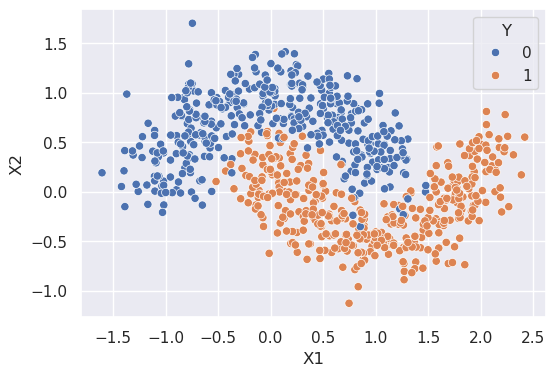

In [6]:
sns.set_theme(rc={'figure.figsize':(6, 4)})
sns.scatterplot(dfTR, x = "X1", y = "X2", hue="Y");

Note that the boundary between the classes is clearly nonllinear. 


---

::: {.callout-note icon=false}

# Fitting the KNN Model

The mechanics of model fitting should by now begin to look familiar. We define a pipeline with preprocess and model steps, and we fit the pipeline to the data. But remember: in this case we have to choose the value of `k`. We begin with a very low value, three neighbors.

:::

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

k = 3

knn_pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                        ('knn', KNeighborsClassifier(n_neighbors=k))])

Now we only need to call fit:

In [9]:
knn_pipe.fit(dfTR[inputs], dfTR[output])

,steps,"[('scaler', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30



---

::: {.callout-tip  icon=false}

### Exercise 001

How many different probabilities do we get out of this model? Think the answer through before running the code below.

:::

In [10]:
# unique, counts = np.unique(knn_pipe.predict_proba(dfTR[inputs])[:, 1], return_counts=True)
# pd.DataFrame({'unique':unique, 'counts':counts})

::: {.callout-tip  icon=false}

### Exercise 002

Compute the accuracy of this KNN classifier for the training set, using the `score` method of the pipeline.  
**Note:** In the previous session we used `accuracy_score`, but for a classifier you can call `score` directly and get the same result. Check this.

:::

In [11]:
# %load "../exclude/code/2_3_Exercise_002.py"


---

::: {.callout-note icon=false}

# Decision Boundary for this KNN Model

Given any choice of the input variables, we can use the `predict` method of the pipeline to get a class prediction, either `Y = 0` or `Y = 1`. Therefore the KNN model divides the sample space (the space where the input variables live) in two regions, divided by a **(hard) class decision boundary**. We can also consider the **probability level curves** that contain points with the same probability. The code in the following script draws these two plots.

:::

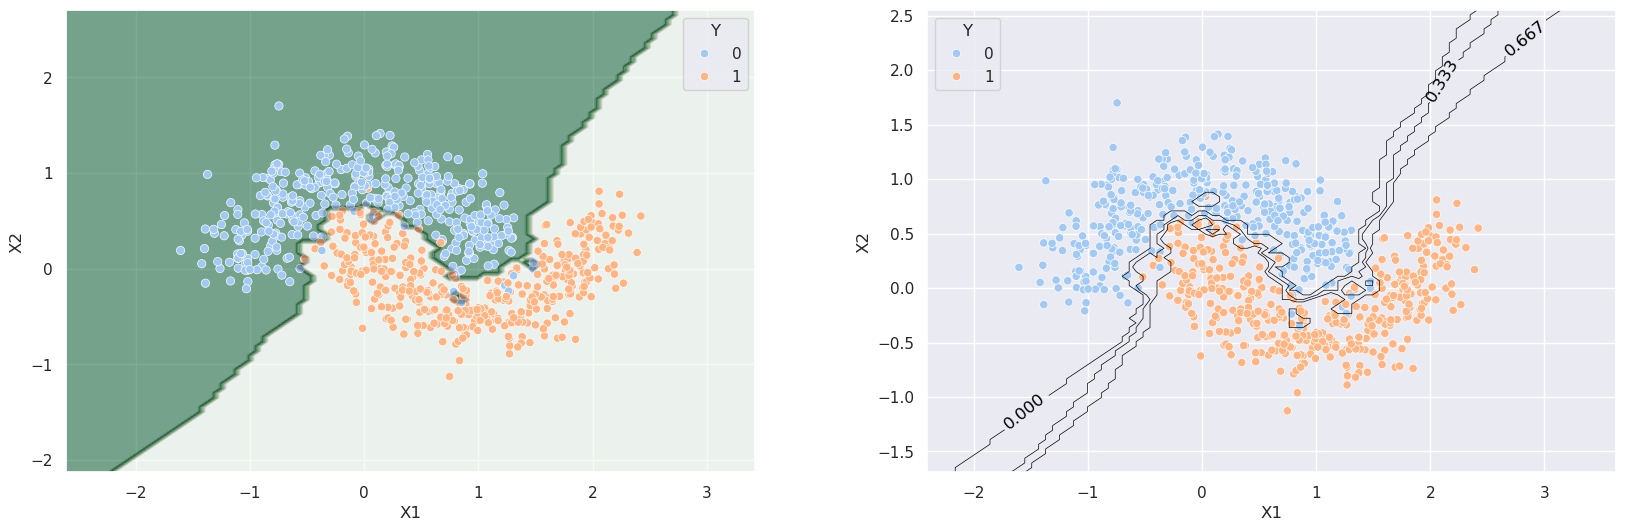

In [12]:
%run -i "2_3_KNN_DecisionBoundary_Plots.py"

The decision curve (left) and level curves (right) look jagged, not smooth at all. The classifier seems to be trying too hard in some cases and getting into far too much detail. Do you think this curves will generalize well to new data?


---

::: {.callout-note icon=false}

# Try Different k Values

Try changing the value of k in the next cell and then uncomment and run the next cell. It will print out the accuracy value for the training set and plot the decision boundary and (at most ten) probability level curves, always using that value of k. 

What happens to the accuray as you increase the value of k? That is, starting at 2 and keeping it under 800, of course. And what happens with the shape of the decision boundary?

Setting `k = 1` is a bad idea in this case. Why?

:::

In [13]:
k = 2

In [14]:
# %run -i "2_3_KNN_Try_different_k_values.py"

::: {.callout-note icon=false}

# Model Flexibility

You see that as we increase the value of k the decision boundary becomes smoother as the jaggedness tends to disappear. For large values of k the decision curve is in fact becoming *too rigid*, resembling a straight line. And so it fails to capture the real class boundary. This behavior is typical of any Machine Learning models and is described as **model flexibility**. For KNN models, flexibility decreases with k.

:::

---

::: {.callout-note icon=false}

# Choose a value of k

After playing for a while with different values of k you probably observed two things:

+ The decision boundary gets smoother as we increase k.
+ The accuracy is high initially, but it drops as k increases.

:::

Building on the last observation, the following plot shows the evolution of accuracy as k increases. You can see that the interesting values are in the below 50 region.

In [15]:
# %run -i "./2_3_KNN_Accuracy_vs_k.py"

---

::: {.callout-tip  icon=false}

### Exercise 003. 

The previous plot does not contain all values of k. Modify the code that generates it to explore in detail the *interesting* values of k. Which one gives you the highest accuracy value? Plot only about 20 values closest to that maximum. Hint: look up [numpy.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

:::

In [16]:
# %run -i "../exclude/code/2_3_Exercise_003.py"

::: {.callout-note icon=false}

# Hyperparameters

The preceding discussion contains a very important idea that we will meet again in many Machine Learning models:  the fact that in order to use the knn classifier, **we first choose a value of `k` and then we fit the model**. This is important, so let us rephrase it: the value of k is not a result of fitting the model to the data, because it needs to be set *before* fitting the model. That is why values like this are called **hyperparameters** of the model. We will see below that there are machine learning models with many hyperparameters.

Choosing the **best value of the hyperparameter** is a different problem, and one that we will discuss in the next section. But first, let us try to understand clearly the task at hand through some questions.

:::

---

::: {.callout-tip  icon=false}

### Exercise 004. Very important!

+ Is it ok to use the value of k that results in the best accuracy in the training set? Do you see any problem with that approach?

+ What if we use test set in place of the training set? How would you reuse the code from the preceding exercise to explore this.  
  **Be careful:**  Your goal is not to simply replace the training set with the test set everywhere in the code. You have to fit the model using the training set and then measure the accuracy of that model **on the test set.** Do you get the same best value for k?  And do you see any problem with this approach? 

:::

In [17]:
# %run -i "../exclude/code/2_3_Exercise_004.py"


::: {.callout-warning icon=false}

### ISLP Book Recommendation

Much of the following discussion is inspired by [Section 2.2 of @ISLP2023]. **We strongly recommend** that you visit the [web page for the book](https://hastie.su.domains/publications.html) and read up to at least this Secion 2.2 as soon as possible!

:::

---

# Validation and the Bias-Variance Trade Off


::: {.callout-note icon=false}

## The Challenge of Selecting the Optimal Value of k. 

If you have thought through the preceding exercise, you probably realized that **we cannot rely on the training set** to select the optimal k: **the performance measures would be too optimistic**, because they are based on data already known by the model. For example, for k=2 we decide the class with only two votes, and one of those is in fact the correct answer (a point is *almost* always its own closest neighbor). Not to mention k = 1! For small values of k the process is therefore contaminated. As k increases this *unfair* advantage of the predictions wears off. But precisely at what value of k, we can not say.

$\quad$

What about using the test set? That of course addresses the previous concern. But remember that we wanted to use the test set to get an **independent performance measure for the final model**. And if we use the test set to select the k value for the final model, information from the test set is already leaking into that selection. Therefore **we cannot use the test set for hyperparameter selection**.



::: 

---

::: {.callout-note icon=false}

## Validation Set.

A possible solution is to introduce a new split in the data, creating a **validation set**, tasked with hyperparameter selection. Therefore we can consider a split of the original data as training/validation/test. Typical data usage proportions are 50/25/25 or 60/20/20, depending in the size of the dataset. 

::: 

::: {.callout-note icon=false}

## Additional Concerns: Dependance on the Sample   <a id='DependanceSample'></a>

There is another problem that we have not yet addressed. If we were to **start with a different sample from the same population** and perform the same pipeline steps, **would the results be very different?** The following code does just that, showing accuracy vs k for 5 different samples. 

::: 

In [18]:
# %run "./2_3_ExploringModelSampleVariance.py"

---

::: {.callout-note icon=false}

## Model Variance. 

This dependance of the modeling result on the sample is denoted as **model variance**. We of course expect variance to become smaller as sample size increases, but for many sample sizes this is a real cause of concern about our model estimates. 

::: 

::: {.callout-tip  icon=false}

### Exercise 005. 

Explore the code used to create the preceding plot. Modify it so that the size of each of the samples is 20 times bigger and run the code again (this should take about one minute of running time). How does the plot change?
:::

---

::: {.callout-note icon=false}

## Model Flexibility. 

Model variance is connected to the notion of **model flexibility** that we discussed when looking at the decision curves. As k increases the model is becoming less flexible, the decision curve begins to look linear and the variance is reduced, compared with the wildly changing decision boundaries that we expect for low values of k. 

::: 

::: {.callout-tip  icon=false}

### Exercise 006. 

Go back to the same code and set the sample size back to 1000. But now use values of k between 200 and 350 (with `k_step = 5` to speed things up). How do the curves look? Also note the vertical scale, compared with the first run of the code. What happens with accuracy for high values of k?

:::

---

::: {.callout-note icon=false}

## Bias of a model 

The **bias** of a model measures its lack of ability to represent the real underlying relation between the inputs and the output. A model, such as a KNN model, is selected from a (hyperparametric) family of functions and therefore can not be expected to approximate any other function. Think of approximating a trigonometric function such as the cosine function with polynomials (e.g. Taylor polynomials). No matter how high the degree, the cosine is not a polynomial and there will always be a bias (error) when using this approximation.

$\quad$

The cosine example also illustrates a general principle. As the degree increases polynomials become more flexible and bias decreases. Bias is therefore also connected with flexibility and in general, **in Machine Learning models bias tends to decrease with increased model flexibility**.  


::: 

---

::: {.callout-note icon=false}

## The Bias-Variance Trade-Off

Both **bias** and **variance** of a model are related to model flexibility. The Bias-Variance Trade-Off is a mathematical description of their relation:
$$
\underbrace{E\left(y_0 - \hat f(x_0)\right)^2}_{\text{Expected generalization error}} = 
\underbrace{\operatorname{Var}\left(\hat f(x_0)\right)}_{\text{Variance}} + 
\underbrace{\operatorname{Bias}\left(\hat f(x_0)\right)^2}_{\text{Bias (squared)}} + 
\underbrace{\operatorname{Var}\left(\epsilon\right)}_{\text{Irreducible error}}
$$  
In this expression:

+ The function $f$ represents the **real underlying relation** between inputs and output. And $\hat f$ is our estimate of $f$; that is, $\hat f$ is our model.
+ The left term is the **average test error** that we expect if we estimate the underlying relation $f$ using many independent samples (and applying the model pipeline to each one of them).
+ The first two terms to the right are the variance and (squared) bias that we have already met. Note that **bias (squared) and variance are both always positive**.
+ The last term to the right is the so called **irreducible error.** We assume that the true relation beyween inputs and output is
  $$Y = f(X) + \epsilon,\qquad\text{ with }E(\epsilon) = 0$$
  Here $\epsilon$ is a (0-mean) random variable, called **random error** because this is not a deterministic model of the relation between $X$ and $Y$.

::: 

---

::: {.callout-note icon=false}

## Bias-Variance and Model Flexibility

Let us now think about how this equation drives our modeling efforts. We already know that as model flexibility increases then bias of the model decreases and model variance increases.To help you visualize think of the decision boundary of a KNN model with decreasing k values (increased flexibility). The irreducible error is out of reach for us, and bias and variance make positive contributions. And in general whenever we decrease flexibility to get lower variance we are increasing bias and viceversa. Since we want to get both small variance and small bias, **our goal in prediction is to select the model where the sum of bias and variance will result in the least possible value of average test error**.

$\quad$

Model selection here means both selecting the model type and the right flexibility of the model. E.g. select between KNN and Logistic Regression, and if KNN is selected, then use the hyperparameter to select the right flexibility.

::: 

::: {.callout-warning icon=false}

### Prediction vs Interpretability

Keep in mind however that good predictions is often not the only goal of modeling. Sometimes our interest is in the **interpretability** of the model (regulatory authorithies may enforce this sometimes) or in researching the **causal** nature of the relation. See [@ISLP2023, Section 2.1.1]

:::

---

::: {.callout-note icon=false}

## Overfitting and Underfitting

To reach the predictive goal, during training we will explore different models and hyperparameter values. As model flexibility increases, there is a growing risk that the model will begin to follow too closely the random noise in the training data. This phenomenon is called **overfitting**, and is a major source of concern to keep in mind while playing with models and hyperparameters. On the other hand, if our model is not flexible enough, it can fail to capture the true signal in the data. This is denoted **underfitting**

Both overfitting and underfitting are illustrated below using the decision boundaries of a KNN model depending on the k value.

::: 

![](./fig/2_3_Overfitting_Underfitting.png){width=100% fig-align="center" fig-alt="Overfitting and Underfitting"}

---

::: {.callout-note icon=false}

## Bias-Variance Relation through Model Flexibility and Problem Linearity

The possible bias of a selected model depends essentially on the true nature of the relation between inputs and output, which is 
$$Y = f(X) + \epsilon.$$ 
If the true $f$ is approximately linear, then a linear model (as Logistic Regression) will do, with added benefits in computation, interpretability, etc. On the other hand, if the real $f$ is highly non linear then we need to use a flexible enough model to estimate it. This choice depends on the nature of the problem and it reflects in the shape of the bias-variance trade-off for each type of model. 

::: 



---

::: {.callout-note icon=false}

## Bias-Variance Relation through Model Flexibility and Problem Linearity

[Figure 2.12 from @ISLP2023] (blue text is ours) appears below and illustrates this discussion for three types of models. Note that the MSE (think model prediction average error) has a U-shape in all cases. The horizontal dashed line is the irreducible error, the blue curve is the bias and the orange is the model variance. The problem is that **in real problems the value of MSE is unknown**.

::: 

![](./fig/2_2_ISLP_Fig2_12_BiasVariance_ModelLinearity.png){width=100% fig-align="center" fig-alt="Bias Variance and Problem Linear Nature"}

Before discussing how to move forward, let us pay a visit to the example that we have been using.

---

::: {.callout-tip  icon=false}

### Exercise 007 

We will now run code that essentially solves Exercise 004 above. That is, we will fit a KNN model for each value of k using the training set. Then we measure the accuracy of that model **on both the training and test set** and we plot their values against k. Note that by doing this we are *ruining* the test set: if we use it to select k it can no longer considered a good test set. So we are really using it as a *validation* set. 

$\quad$

In the graph we use `1 - accuracy` as a measure of the prediction error and we use `1 / k` as a proxy measure of complexity (because this quotient increases as `k` increases). The question in this exercise is, looking at the resulting graph: what do you think about the nature of this problem? Is it a linear problem? 

$\quad$

Your second task now is to read [Section 2.2.3 of @ISLP2023] to put this exercise in context.

:::

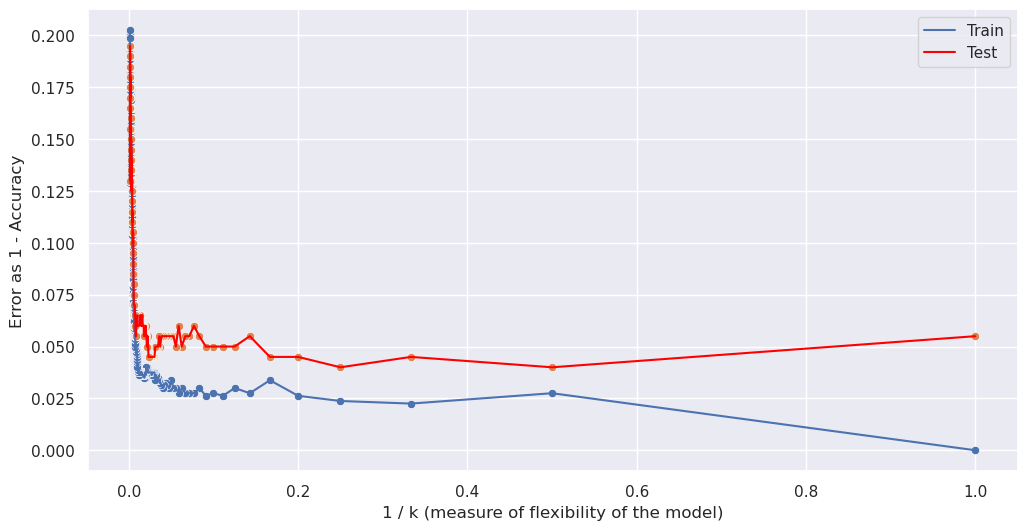

In [19]:
%run -i "./2_3_Code_For_Exercise_007.py"

---

# Resampling Methods

::: {.callout-note icon=false}

## Understanding the Challenges of the Bias-Variance Trade-Off

With a deeper understanding of the modeling challenges we see that to move forward we need to care about these issues:

+ We would like a sensible estimate of the test error (what we called MSE) in order to select the right model complexity that will give us the lowest possible bias and variance sum.
+ We can use validation sets to do so, gradually increasing the complexity using hyperparameters. But as we do, variance of the model increases and we need to worry about the robustness of this validation estimates. Recall the plot in the *Dependance on the Sample* paragraph above. 
+ With increased complexity there is also an increased risk of overfitting, which validation can help us detect. But then again, this depends on stable, robust, validation performance measures.

**Resampling methods** are a fundamental tool in Statistics when dealing with variance. We will repeatedly resample data from the training set. Every time we do this we get a new validation measure estimate and the average and spread of these resampling estimates provides a more robust information. The widely used **K-Fold Cross-Validation** is one such resampling method.

::: 



---

# Cross-Validation

::: {.callout-note icon=false}

## The K-Fold Cross-Validation Procedure

Cross-validation works in a series of steps (see the picture below): 

+ First split the (training) data into K disjoint subsets, or **folds**. 
+ Iterate using  each fold in turn as validation set, while the remaining K - 1 folds are used to train a model. 
+ Each iteration produces an estimate of the error, let us call $E_i$ the error estimate for the $i$-th iteration.
+ Finally obtain the average estimate
  $$CV_K = \dfrac{1}{K}\sum_{i = 1}^K E_i$$
  called the **(cross-)validation error.**  

In summary, Cross-Validation replaces the use of a single training/validation split set with a set of K training/validation resamples using the folds.

::: 

::: {.callout-warning icon=false}

Do not get confused by notation: this K has nothing to do with the k in KNN!

:::

---

![](./fig/2_3_CrossValidationScheme.png){width=100% fig-align="center" fig-alt="K-Fold Cross Validation Scheme"}

::: {.callout-note icon=false}

## Remarks about Cross-Validation

The number of folds can be anything from 2 to the number of data points in the training set. But the most commonly used values are K = 5 or K = 10 (the default choice in many settings).  

Using as many samples as training set data points is called **leave one out cross-validation (loocv)**, because each point in turn is used as validation while all the remaining are used for training. 

Using K-Fold cross validation with values such as 10 we obtain a more robust estimate of the test set average prediction error. But be careful: K-Fold cross validation is not guaranteed to locate the optimal complexity level to achieve minimal test error. But experience has shown that it results in good predictive models in many cases. 

::: 




---

::: {.callout-note icon=false}

## Combining Cross-Validation with Hyperparameter Grid Search

Since K-fold cross validation is expected to provide reliable estimates of the average test error, we can use it to select the hyperparameter values (and therefore model complexity) that will lead to simultaneously low values of bias and variance. 

We incorporate this into our hyperparameter selection procedure by applying K-fold cross validation for each value of the hyperparameter, or combination of hyperparameter values in models that have more than one. This set of possible hyperparameters values is called a **grid** and for each point in the grid we apply K-fold cross validation. Therefore this method comes at the expense of a great deal of computational power.

::: 

In the KNN model example, when trying to identify the best possible model we trained a model for each value of the hyperparameter k from 1 or 2 up to 300 (or similar values). To incorporate 10-fold cross validation we will train 10 models for each one of those k values (we are talking thousands of models). 

---

::: {.callout-note icon=false}

## Implementing K-Fold Cross-Validation with Python Pipelines

We will now see how this method can be incorporated into the pipeline framework. In order to do so we will return to the synthetic dataset example in the `SimData0.csv` file (it should already be in the folder for this session). This is the same dataset that we used for multidimensional Logistic Regression. Thus our first step now is to run the same preprocessing steps that precede the construction of the pipeline for that example. 

::: 

In [22]:
%run -i  "../exclude/2_2_Exercise_001.py"

Preprocessing completed. Train and test set created.


---

::: {.callout-note icon=false}

## Bringing Hyperparameter Search and Cross-Validation into the Pipeline for KNN

We are going to create a pipeline that implements a grid search with 10-fold cross validation to try to estimate
 the optimal value of k in a KNN model for this dataset.

 We begin by defining the k values that we want to use. We will go from 3 to the training data size in 15 steps.

::: 

In [23]:
k_values = np.ceil(np.linspace(3, XTR.shape[0] / 2, num=15)).astype("int").tolist()
k_values

[3, 31, 59, 87, 114, 142, 170, 198, 225, 253, 281, 309, 336, 364, 392]

And now we use that list of values to create a dictionary that will be used in the hyperparameter grid search below. The double underscore `__` after `knn` is not arbitrary as we will see.

In [24]:
hyp_grid = {'knn__n_neighbors': k_values} 

---

::: {.callout-note icon=false}

## The Preprocessing Step of the Pipeline

The preprocessing step for the new pipeline is the same that we used for Logistic Regression. The numeric inputs are scaled while the categorical (one hot encoded) inputs are left untouched (recall `passthrough`).

::: 

In [25]:
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_inputs),
        ("cat", "passthrough", ohe_inputs),
    ]
)

---

::: {.callout-note icon=false}

## The Model with Hyperparameters Step

Now we define a pipeline where the KNN model is be fitted to the data after preprocessing. This is not yet the final pipeline!

::: 

In [26]:
knn_pipe = Pipeline(steps=[('preproc', preprocessor), 
                           ('knn', KNeighborsClassifier())])

::: {.callout-note icon=false}

## Combining this Pipeline with Grid Search and Cross-Validation

The pipeline that we just defined is the one to be applied for each fold and for each choice of the hyperparameter k. You may have noticed that the `KNeighborsClassifier` function does not define a value for k using its `n_neighbors` argument (as we have seen in previous KNN examples). But the name of this step in the pipeline is `knn`. And if you look back to the `hyp_grid` dictionary, you see that we used the key `knn__n_neighbors`. The name before the double score identifies the step in the pipeline. And the name after it identifies the argument of the function that we use as hyperparameter.

::: 

---

::: {.callout-note icon=false}

## Put it Together: the Complete Pipeline.

We use the [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function to build this pipeline that combines Cross-Validation (CV) with hyperparameter grid searching. The function requires an estimator argument, that is the preceding (inner) pipeline that preprocesses and fits a KNN model to each fold. It also requires the hyperparameter grid dictionary.

`GridSearchCV` has a `cv` argument that describes how folds are created for cross-validation. In its most basic version we write something like `cv = 10` to use 10-fold cross-validation.  But for this example we eant to be able to peek into the inner workings of `GridSearchCV`. Therefore we use another function, [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) to create the folds (it is a *splitter*) explicitly following our recipe. 

::: 

In [27]:
from sklearn.model_selection import StratifiedKFold
num_folds = 10
cv_splitter = StratifiedKFold(shuffle=True, n_splits=num_folds, random_state=1)

Creating the pipeline now is really simple (the commented line is the simplest version):

In [28]:
from sklearn.model_selection import GridSearchCV

knn_gridCV = GridSearchCV(estimator=knn_pipe, 
                        param_grid=hyp_grid, 
                        # cv=num_folds,
                        cv=cv_splitter, 
                        return_train_score=True)

---

::: {.callout-note icon=false}

## Fitting the `GridSearchCV` KNN Pipeline.

The  `knn_gridCV` pipeline behaves in many ways like any of the previous model pipelines we have seen. In particular, to get the fitted models from the training data we just need to call fit. 

**Note:** Use the html or Notebook versions of this document to explore the resulting object. There is a lot going on here under this simple looking command, and we will explore it below!

::: 

In [29]:
knn_gridCV.fit(XTR, YTR) 

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__n_neighbors': [3, 31, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,transformers,"[('num', ...), ('cat', ...)]"


---

::: {.callout-note icon=false}

## Looking at the Results of the Fitted`GridSearchCV` KNN Pipeline.

One of our goals with `GridSearchCV` is to select the optimal value of the hyperparameter k. To see which one was selected we proceed as follows:

::: 

In [30]:
knn_gridCV.best_params_

{'knn__n_neighbors': 3}

::: {.callout-note icon=false}

## Training and Test Scores

And using this value of the hyperparameter we get the following scores in training and test:

::: 

In [31]:
knn_gridCV.score(XTR, YTR), knn_gridCV.score(XTS, YTS)


(0.9821200510855683, 0.9396984924623115)

These are accuracy data, and we see a sizeable difference between the result in trainnig and test (though not too big). We can see in this a hint at a possible overfitting of the model.  

---

::: {.callout-note icon=false}

## Training Data Usage in Cross-Validation

By now you might be thinking that with this cross-validation methods we end up training our model with a smaller portion of the training data. But do not worry: after cross-validation and grid search finish, scikit fits a **final version of the model, using the selected hyperparameter(s) and all of the training data.**

This final version of the model is the one that will be automatically used for predictions, so you will rarely need to access it directly (you can use `knn_gridCV.best_estimator_` in that case).

::: 

---

::: {.callout-note icon=false}

## Visualizing the Grid Search with CV

The follwing plot describes the results of the grid search over the hyperparameter k. The red dots are the mean validation scores for each value of k. The blue vertical bars show the variability of the validation score over the 10 folds. 

::: 

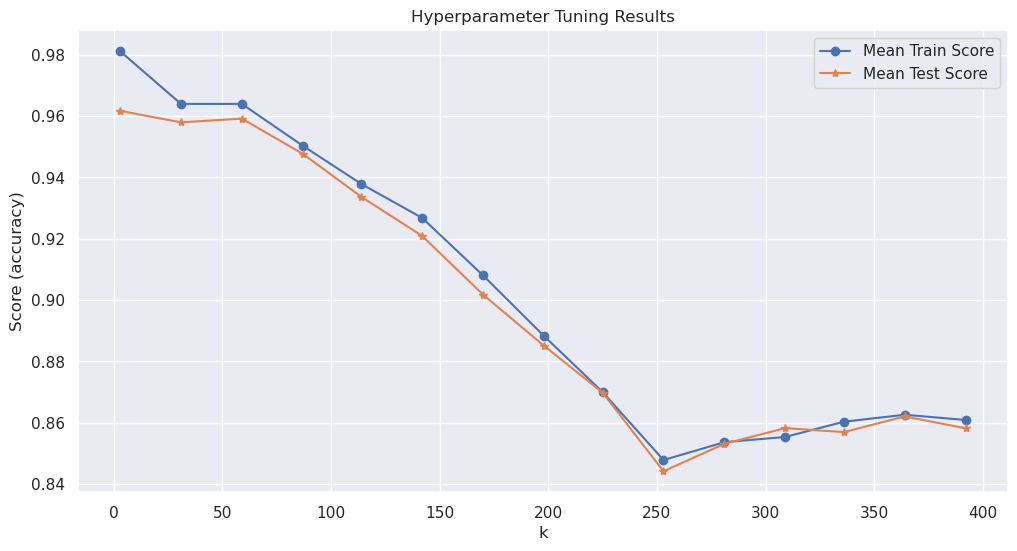

In [32]:
param_values = knn_gridCV.cv_results_['param_knn__n_neighbors']

mean_train_scores = knn_gridCV.cv_results_['mean_train_score']
plt.plot(param_values, mean_train_scores, marker='o', label='Mean Train Score')

mean_test_scores = knn_gridCV.cv_results_['mean_test_score']
plt.plot(param_values, mean_test_scores, marker='*', label='Mean Test Score')

plt.xlabel('k')
plt.ylabel('Score (accuracy)')
plt.title('Hyperparameter Tuning Results')
plt.legend()  # Add a legend to the plot
plt.show()
plt.close()



---

::: {.callout-note icon=false}

## More Details About GridSearchCV

We said that we were using the splitter provided by `StratifiedKFold` to be able to look into `GridSearchCV` with some detail. The following long exercise allows us to do just that. But keep in mind that we will not neeed many of these details in our common usage of `GridSearchCV` in model training.

::: 

::: {.callout-tip  icon=false}

### Exercise 008, first part.

Let us begin by understanding how `StratifiedKFold` works. Uncomment and run the following lines of code to see how the training and test indices of a fold are generated.

:::

In [33]:
# cv_split = cv_splitter.split(XTR, YTR)
# folds = [fold for fold in cv_split]
# fold_TR_0, fold_TS_0, = folds[0]
# fold_TR_0[0:10], fold_TS_0[0:10]

---

::: {.callout-tip  icon=false}

### Exercise 008, second part.

Now load and examine the following code script before running it. `GridSearchCV` is a kind of double loop, over hyperparameter values and over folds, and this code makes the first of these loops explicit. The loop over folds is performed by [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html). 

:::

In [34]:
# %load "2_3_GridSearchCV_details.py"

::: {.callout-tip  icon=false}

### Exercise 008, final.

Finally execute the following cells, reading the comments in them. Where have you seen (partially) the output of the last one?

:::

In [35]:
# # train scores (mean across folds) in the first fold for all values of k
# knn_gridCV.cv_results_['split0_train_score']

In [36]:
# # The same resukt from keep_cv:
# # loop with i through the values of k, getting the train scores for the first fold
# np.array([keep_cv[i]["train_score"][0] for i in range(15)])

In [37]:
# # Using the third value of k, get the indices of the test fold number 0
# keep_cv[3]["indices"]["test"][0]

---

# Model Performance Evaluation

::: {.callout-note  icon=false}

### Getting Predictions 

The final model that comes out of `GrisSearchCV` is a binary classifier. We use it to get predictions and we measure its performance as we did in the previous session for Logistic Regression. In this case we will work in parallel with training and test prediction and performance. 

$\quad$

We begin by creating datasets to store predcitions.

:::

In [38]:
# Training predictions dataset
dfTR_eval = XTR.copy()
dfTR_eval['Y'] = YTR 
dfTR_eval['Y_knn_prob_neg'] = knn_gridCV.predict_proba(XTR)[:, 0]
dfTR_eval['Y_knn_prob_pos'] = knn_gridCV.predict_proba(XTR)[:, 1]
dfTR_eval['Y_knn_pred'] = knn_gridCV.predict(XTR)

In [39]:
# Test predictions dataset
dfTS_eval = XTS.copy()
dfTS_eval['Y'] = YTS
dfTS_eval['Y_knn_prob_neg'] = knn_gridCV.predict_proba(XTS)[:, 0]
dfTS_eval['Y_knn_prob_pos'] = knn_gridCV.predict_proba(XTS)[:, 1]
dfTS_eval['Y_knn_pred'] = knn_gridCV.predict(XTS)

---

::: {.callout-note  icon=false}

### Confusion Matrices 

Use this code to displays both matrices for training (left) anf test (right).

:::

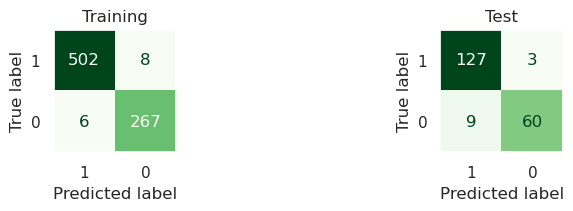

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = knn_gridCV
fig = plt.figure(constrained_layout=True, figsize=(6, 2))
spec = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training'); ax1.grid(False)
ax2 = fig.add_subplot(spec[0, 2]);ax2.set_title('Test'); ax2.grid(False)
ConfusionMatrixDisplay.from_estimator(model, XTR, YTR, cmap="Greens", colorbar=False, ax=ax1, labels=[1, 0])
ConfusionMatrixDisplay.from_estimator(model, XTS, YTS, cmap="Greens", colorbar=False, ax=ax2, labels=[1, 0])
plt.show(); 


::: {.callout-tip  icon=false}

### Exercise 009.

Practice obtaining some performance measures for the test set, such as sensitivity, kappa or f1.

:::

---

::: {.callout-note  icon=false}

### Roc Curves

Similarly, we get ROC curves and ROC AUC for training and test.

:::

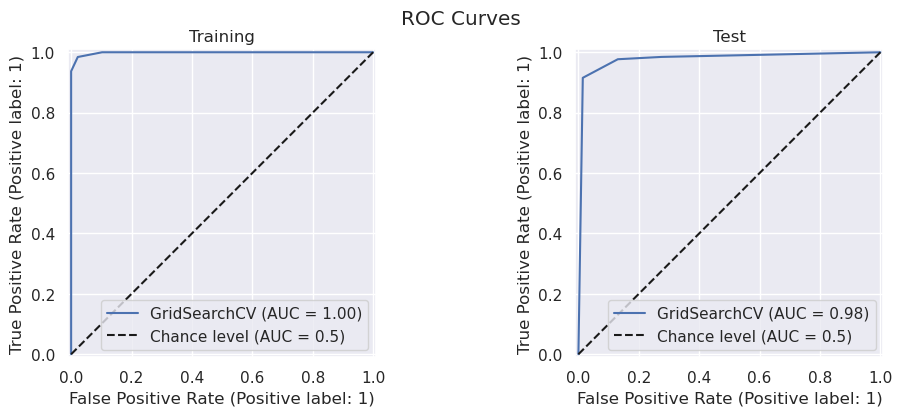

In [41]:
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(12, 4))
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training')
ax2 = fig.add_subplot(spec[0, 1]);ax2.set_title('Test')
RocCurveDisplay.from_estimator(model, XTR, YTR, plot_chance_level=True, ax=ax1)
RocCurveDisplay.from_estimator(model, XTS, YTS, plot_chance_level=True, ax=ax2);
plt.suptitle("ROC Curves")
plt.show(); 

---

::: {.callout-note  icon=false}

### Calibration Curves

:::

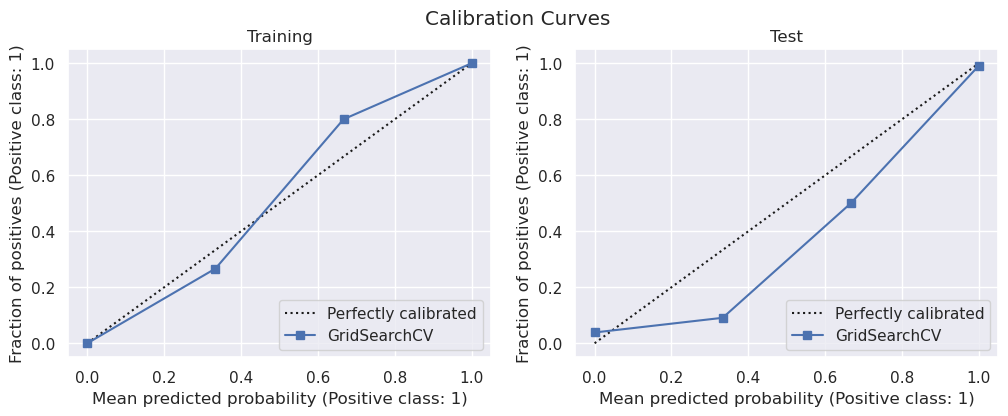

In [42]:
from sklearn.calibration import CalibrationDisplay
fig = plt.figure(figsize=(12, 4))
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training')
ax2 = fig.add_subplot(spec[0, 1]);ax2.set_title('Test')
CalibrationDisplay.from_estimator(model, XTR, YTR, n_bins=10, ax=ax1)
CalibrationDisplay.from_estimator(model, XTS, YTS, n_bins=10, ax=ax2);
plt.suptitle("Calibration Curves")
plt.show(); plt.rcParams['figure.figsize']=plt.rcParamsDefault['figure.figsize']



---

# Model Comparison

::: {.callout-note  icon=false}

### Deciding Between Models

Now we have trained two different models for this dataset: a logist regresion model and a KNN model. Which one shoukd we choose? First let us recover the predictions from the Logistic Regression model.

:::

In [43]:
from sklearn.linear_model import LogisticRegression
LogReg_pipe = Pipeline(steps=[('preproc', preprocessor),
                        ('LogReg', LogisticRegression(penalty=None))]) 
LogReg_pipe.fit(XTR, YTR)

dfTS_eval['Y_LR_prob_neg'] = LogReg_pipe.predict_proba(XTS)[:, 0]
dfTS_eval['Y_LR_prob_pos'] = LogReg_pipe.predict_proba(XTS)[:, 1]
dfTS_eval['Y_LR_pred'] = LogReg_pipe.predict(XTS)

---

::: {.callout-note  icon=false}

## Cross-Validation for Logistic Regression

We have met cross-validation in the context of hyperparameter grid search. Thus you may think that it plays no part in plain Logistic Regression models, because they have no hyperparameters. We will soon meet a version of Logistic Regression that has. But even in the plain case, cross-validation can help us analize the variance of the model. We get a set of test accuracy measures that provide a more robust estimate of the dependance of the result on the training set. We can use `cross_val_score` to apply cross validation and get these measures directly.

::: 

In [44]:
from sklearn.model_selection import cross_val_score
metric = 'accuracy'
cross_val_score(LogReg_pipe, XTR, YTR, cv=10, scoring='accuracy')


array([0.89873418, 0.87341772, 0.7721519 , 0.75641026, 0.83333333,
       0.80769231, 0.83333333, 0.85897436, 0.82051282, 0.78205128])

::: {.callout-tip  icon=false}

### Exercise 010.

Apply `cross_val_score` to get cross-validation test scores for the knn model. The `GridSearchCV` function already provided a set of such scores. Where are they stored? Are these the same? What is the difference?  

:::

---

::: {.callout-note  icon=false}

## Using Cross-Validation Test Scores for Model Comparison

We use this in the code below to compare the test scores distributions of out two models with parallel boxplots bor both distributions.

::: 

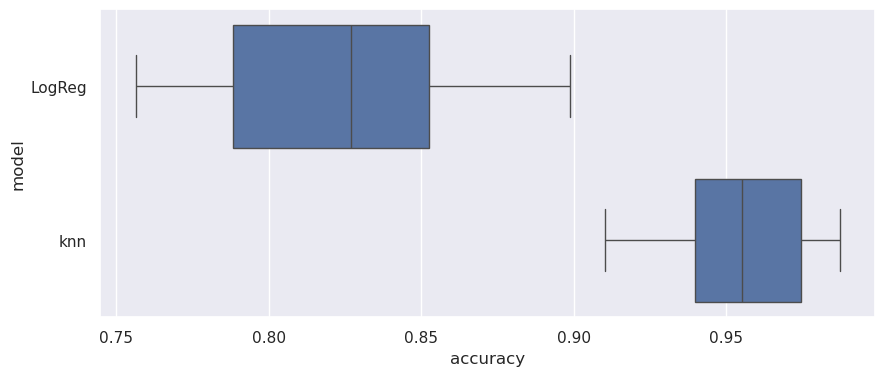

In [45]:
metric = 'accuracy'
score = {'LogReg': cross_val_score(LogReg_pipe, XTR, YTR, cv=10, scoring='accuracy'), 
        'knn': cross_val_score(knn_gridCV, XTR, YTR, cv=10, scoring='accuracy')}
fig = plt.figure(figsize=(10, 4))
model_scores = pd.DataFrame(score)
sns.boxplot(model_scores.melt(var_name="model", value_name=metric), x=metric, y ="model");

::: {.callout-tip  icon=false}

### Exercise 011.

+ What is your conclusion about the two models? Was this conclusion to be expected?
+ What does the `melt` function do in the code above?

:::

---

::: {.callout-note  icon=false}

### Comparing with ROC Curves

A plot that compares the ROC curves of voth models is frequently used to highlight their differences.

:::

<Figure size 600x400 with 0 Axes>

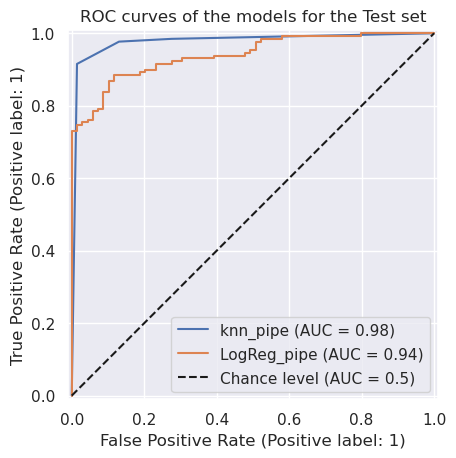

In [46]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(6, 4))
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(knn_gridCV, XTS, YTS, ax=ax,  name="knn_pipe", pos_label=1)
RocCurveDisplay.from_estimator(LogReg_pipe, XTS, YTS, plot_chance_level=True, ax=ax,  name="LogReg_pipe", pos_label=1)
plt.title("ROC curves of the models for the Test set")
plt.show()

---

::: {.callout-note  icon=false}

### Calibration Curves

Can be used as well to compare the models.

:::

<Figure size 1200x1200 with 0 Axes>

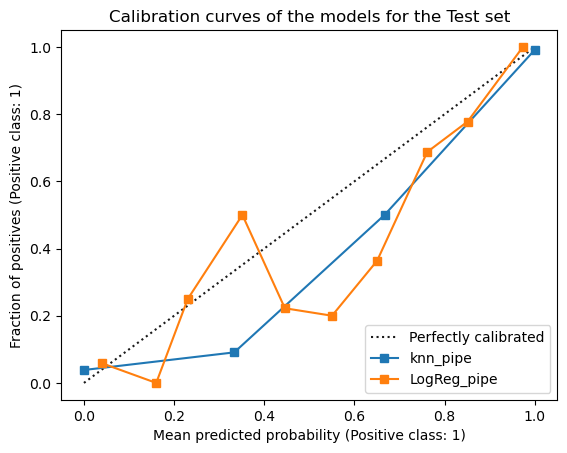

In [47]:
plt.rcdefaults();
from sklearn.calibration import CalibrationDisplay
plt.figure(constrained_layout=False, figsize=(12, 12))
fig, ax = plt.subplots()
CalibrationDisplay.from_estimator(knn_gridCV, XTS, YTS, n_bins=10,
                                  name="knn_pipe", pos_label = 1, ax=ax)
CalibrationDisplay.from_estimator(LogReg_pipe, XTS, YTS, n_bins=10,
                                  name="LogReg_pipe", pos_label = 1, ax=ax)
plt.title("Calibration curves of the models for the Test set")
plt.show()

---

::: {.callout-note  icon=false}

## In the Next Session

We will meet a very important famility of Machine Learning models, the Decision Trees. These models and their generalizations are amongst the top performing models in classical Machine Learning (pre Deep Learning). We will discuss the concept of feature importance and continue the discussion about feature selection. We will also see how to add non linear temrs to a Logistic Regression model.

:::

---

# References